# `Practice notebook for multivariate analysis using NHANES data`

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

path = "data/nhanes-2015-2016.csv"
da = pd.read_csv(path)
da.columns


Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## `Question 1`

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

          BPXDI1    BPXDI2
BPXDI1  1.000000  0.884722
BPXDI2  0.884722  1.000000




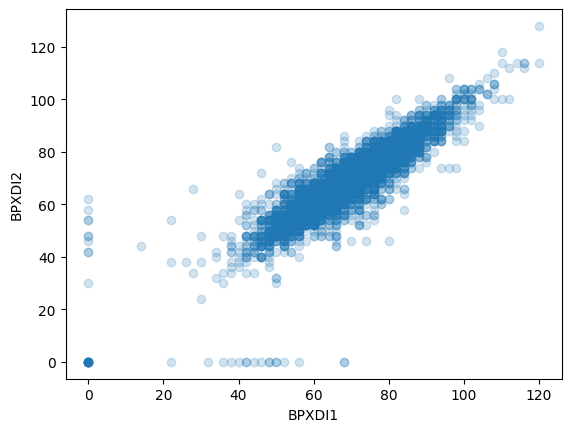

In [2]:
# enter your code here
sns.regplot(x="BPXDI1", y="BPXDI2", data=da, fit_reg=False, scatter_kws={"alpha": 0.2})
print(da.loc[:, ["BPXDI1", "BPXDI2"]].dropna().corr())
print("\n")


          BPXSY1    BPXDI1
BPXSY1  1.000000  0.316531
BPXDI1  0.316531  1.000000


          BPXSY2    BPXDI2
BPXSY2  1.000000  0.303847
BPXDI2  0.303847  1.000000


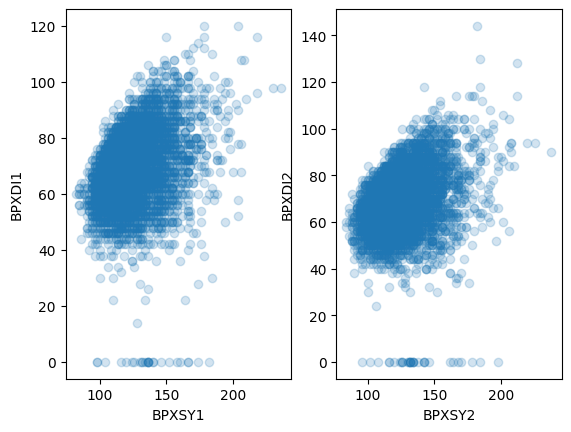

In [4]:
f,axes = plt.subplots(1,2)
sns.regplot(x="BPXSY1", y="BPXDI1", data=da, fit_reg=False, scatter_kws={"alpha": 0.2},ax = axes[0])
sns.regplot(x="BPXSY2", y="BPXDI2", data=da, fit_reg=False, scatter_kws={"alpha": 0.2},ax = axes[1])

print(da.loc[:, ["BPXSY1", "BPXDI1"]].dropna().corr())
print("\n")
print(da.loc[:, ["BPXSY2", "BPXDI2"]].dropna().corr())

__`Q1a.`__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

> **`Answer`**: The correlation is not that strong

__`Q2a.`__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

> **`Answer`**: Less

Log transform the four blood pressure variables and repeat question 1.

c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


               log_value_SY1  log_value_DI1
log_value_SY1       1.000000       0.330588
log_value_DI1       0.330588       1.000000
               log_value_SY2  log_value_DI2
log_value_SY2       1.000000       0.329064
log_value_DI2       0.329064       1.000000


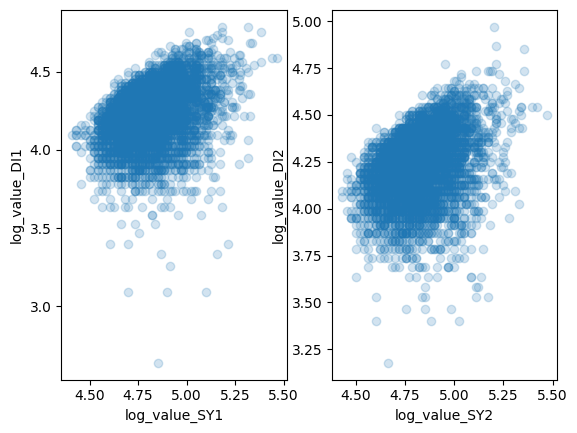

In [5]:
# enter your code here
da["log_value_SY1"] = np.log(da["BPXSY1"])
da["log_value_SY2"] = np.log(da["BPXSY2"])
da["log_value_DI1"] = np.log(da["BPXDI1"])
da["log_value_DI2"] = np.log(da["BPXDI2"])

f,axes = plt.subplots(1,2)
sns.regplot(x=("log_value_SY1"), y=("log_value_DI1"), data=da, fit_reg=False, scatter_kws={"alpha": 0.2},ax = axes[0])
sns.regplot(x=("log_value_SY2"), y=("log_value_DI2"), data=da, fit_reg=False, scatter_kws={"alpha": 0.2},ax = axes[1])

print(da.loc[:, ["log_value_SY1","log_value_DI1"]].dropna().corr())
print(da.loc[:, ["log_value_SY2","log_value_DI2"]].dropna().corr())

__`Qa.`__ Does the correlation analysis on log tranformed data lead to any important insights that the correlation analysis on the untransformed data missed?

> **`Answer`**: A little change

## `Question 2`

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

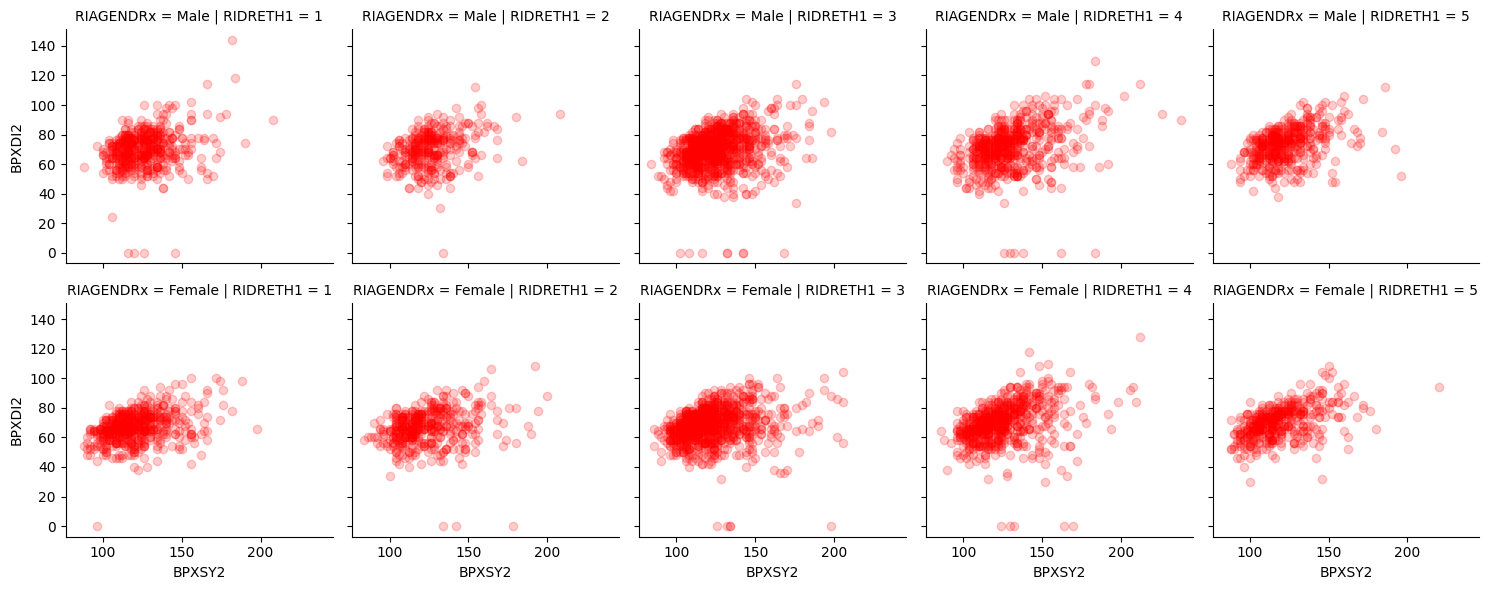

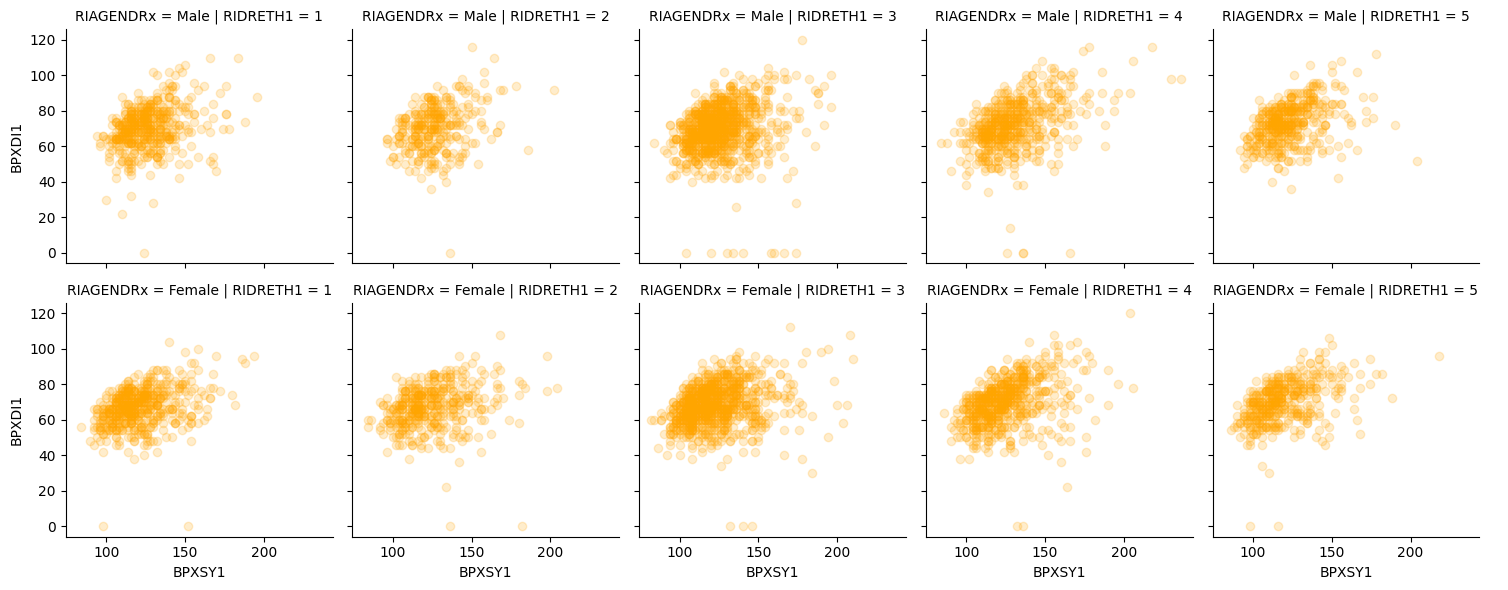

In [6]:
# insert your code here

da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 

sns.FacetGrid(da, row = "RIAGENDRx", col="RIDRETH1").map(plt.scatter, "BPXSY2", "BPXDI2", color = "red", alpha=0.2).add_legend()
sns.FacetGrid(da, row = "RIAGENDRx", col="RIDRETH1").map(plt.scatter, "BPXSY1", "BPXDI1", color = "orange", alpha=0.2).add_legend()


__`Q3a.`__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

> **`Answer`**:

## `Question 3`

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-vi

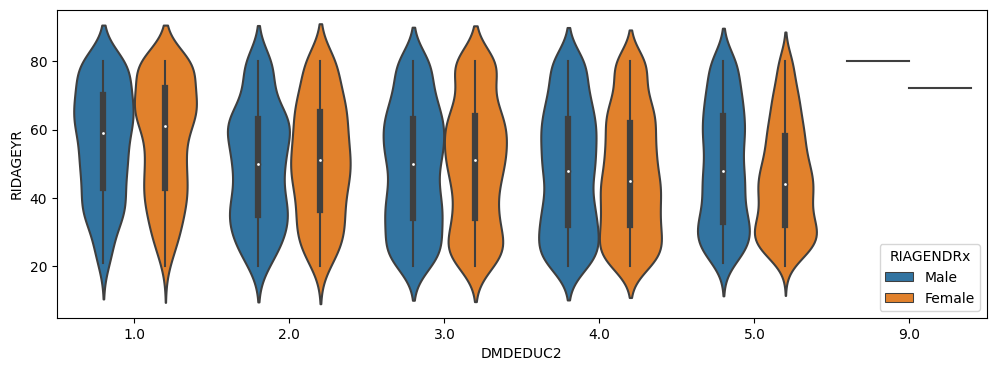

In [7]:
# insert your code here
plt.figure(figsize=(12, 4))
ax = sns.violinplot(x="DMDEDUC2", y="RIDAGEYR", hue="RIAGENDRx",data=da)


__`Q4a.`__ Comment on any evident differences among the age distributions in the different demographic groups.

> **`Answer`**: 

## `Question 4`

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.ap

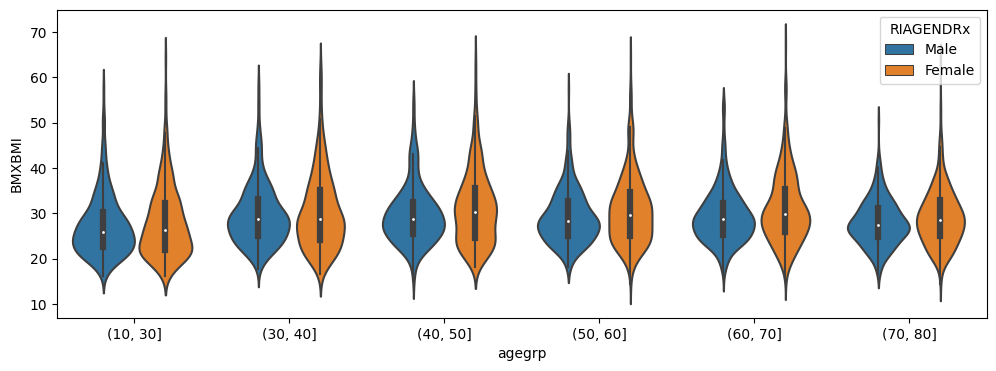

In [8]:
# insert your code here
da["agegrp"] = pd.cut(da.RIDAGEYR, [10, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 4))
ax = sns.violinplot(x="agegrp", y="BMXBMI", hue="RIAGENDRx",data=da)


__`Q5a.`__ Comment on the trends in BMI across the demographic groups.

> **`Answer`**: 

## `Question 5`

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

__`Q6a.`__ Which ethnic group has the highest rate of being uninsured in the past year?